# Task 1: Setting the Baseline 
## Task 1.1 Data Preparation and Validation Pipeline

In [254]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_train.csv")
df_raw_test = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_test.csv")

### Visualize few trajectories

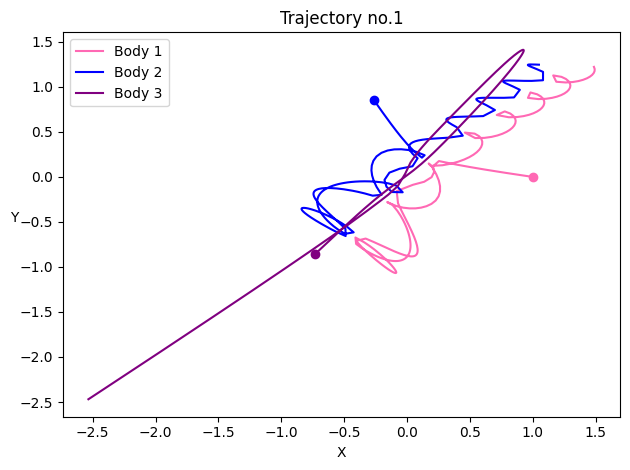

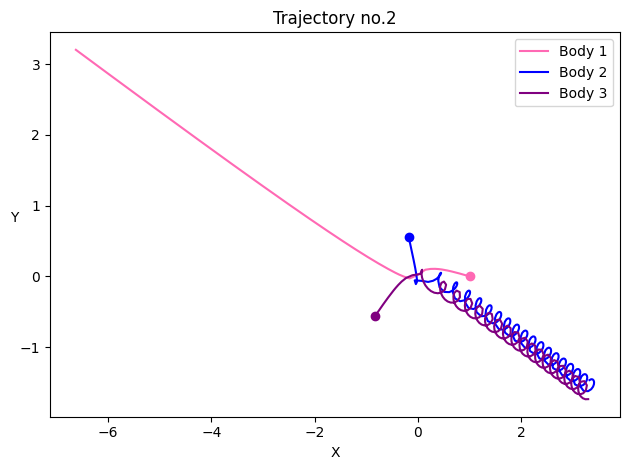

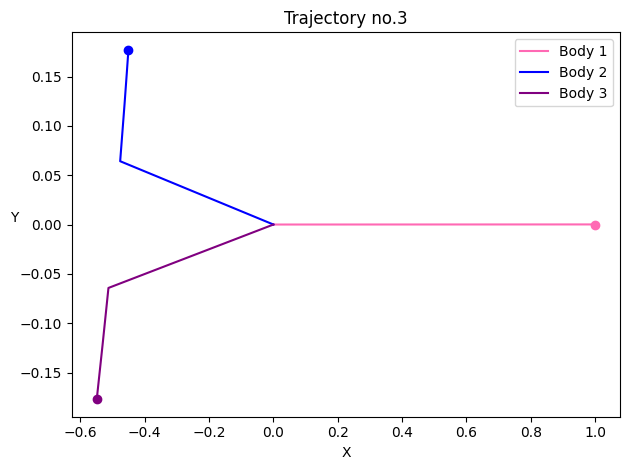

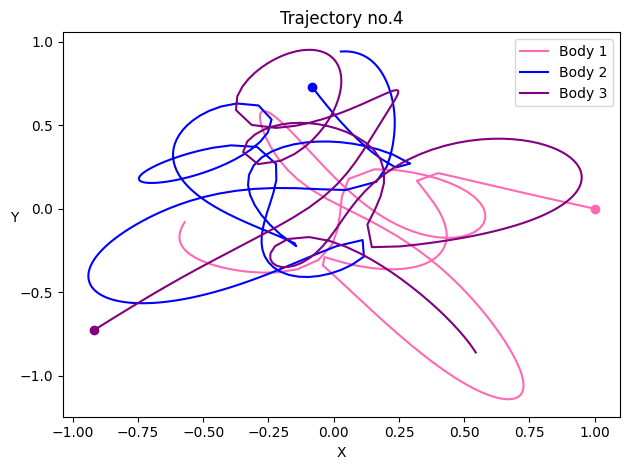

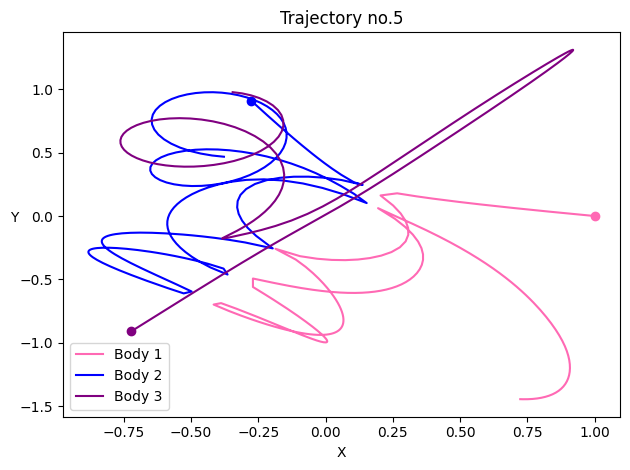

In [255]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


### Prepare the dataset

In [256]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [257]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [258]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [259]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,group,t_init,x_1_init,y_1_init,v_x_1_init,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0,0.0,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0,0.0,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0,0.0,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0,0.0,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0,0.0,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284481,9.843750,-0.932575,-2.334208,0.656761,-2.165135,-1.022670,-2.212383,-0.735155,1.948568,1.955245,4.546591,0.078393,0.216566,1284481,4997,0.0,1.0,0.0,0.0,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284482,9.882810,-0.918159,-2.401290,0.194456,-1.405421,-1.040137,-2.153735,-0.272290,1.190154,1.958296,4.555025,0.077834,0.215267,1284482,4997,0.0,1.0,0.0,0.0,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284483,9.921880,-0.913998,-2.448691,0.037030,-1.050570,-1.047328,-2.114718,-0.114306,0.836599,1.961326,4.563409,0.077276,0.213971,1284483,4997,0.0,1.0,0.0,0.0,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229
1284484,9.960940,-0.914413,-2.484791,-0.051593,-0.809496,-1.049921,-2.086951,-0.025127,0.596815,1.964333,4.571742,0.076720,0.212680,1284484,4997,0.0,1.0,0.0,0.0,0.0,-0.112039,0.505901,0.0,0.0,-0.887961,-0.505901,0.0,0.0,1284229


In [260]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,group,t_init,x_1_init,y_1_init,v_x_1_init,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
7196,0.000000,1.000000,0.000000,0.000000,0.000000,-0.298606,0.105979,0.000000,0.000000,-0.701394,-0.105979,0.000000,0.000000,7196,28,0.0,1.0,0.0,0.0,0.0,-0.298606,0.105979,0.0,0.0,-0.701394,-0.105979,0.0,0.0,7196
7197,0.039062,0.999290,0.000020,-0.036351,0.001025,-0.301435,0.104219,-0.145759,-0.090597,-0.697855,-0.104239,0.182110,0.089572,7197,28,0.0,1.0,0.0,0.0,0.0,-0.298606,0.105979,0.0,0.0,-0.701394,-0.105979,0.0,0.0,7196
7198,0.078125,0.997160,0.000079,-0.072709,0.001985,-0.310145,0.098826,-0.303323,-0.187113,-0.687015,-0.098905,0.376032,0.185127,7198,28,0.0,1.0,0.0,0.0,0.0,-0.298606,0.105979,0.0,0.0,-0.701394,-0.105979,0.0,0.0,7196
7199,0.117188,0.993609,0.000174,-0.109079,0.002817,-0.325500,0.089416,-0.489623,-0.298061,-0.668109,-0.089590,0.598702,0.295244,7199,28,0.0,1.0,0.0,0.0,0.0,-0.298606,0.105979,0.0,0.0,-0.701394,-0.105979,0.0,0.0,7196
7200,0.156250,0.988638,0.000297,-0.145474,0.003462,-0.349193,0.075139,-0.738710,-0.440598,-0.639445,-0.075436,0.884184,0.437136,7200,28,0.0,1.0,0.0,0.0,0.0,-0.298606,0.105979,0.0,0.0,-0.701394,-0.105979,0.0,0.0,7196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995,4999,0.0,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996,4999,0.0,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997,4999,0.0,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998,4999,0.0,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


In [261]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,group,t_init,x_1_init,y_1_init,v_x_1_init,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
3855,0.000000,1.000000,0.000000,0.000000,0.000000,-0.442162,0.856484,0.000000,0.000000,-0.557838,-0.856484,0.000000,0.000000,3855,15,0.0,1.0,0.0,0.0,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3856,0.039062,0.999555,0.000022,-0.022776,0.001135,-0.441946,0.856088,0.011048,-0.020318,-0.557609,-0.856110,0.011727,0.019182,3856,15,0.0,1.0,0.0,0.0,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3857,0.078125,0.998220,0.000089,-0.045592,0.002274,-0.441298,0.854897,0.022117,-0.040672,-0.556922,-0.854985,0.023475,0.038399,3857,15,0.0,1.0,0.0,0.0,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3858,0.117188,0.995992,0.000200,-0.068491,0.003417,-0.440217,0.852909,0.033227,-0.061101,-0.555775,-0.853109,0.035264,0.057684,3858,15,0.0,1.0,0.0,0.0,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3859,0.156250,0.992868,0.000356,-0.091515,0.004567,-0.438702,0.850122,0.044398,-0.081640,-0.554166,-0.850477,0.047117,0.077073,3859,15,0.0,1.0,0.0,0.0,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1283453,4993,0.0,1.0,0.0,0.0,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1283454,4993,0.0,1.0,0.0,0.0,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1283455,4993,0.0,1.0,0.0,0.0,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1283456,4993,0.0,1.0,0.0,0.0,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201


### Verify dataset splitting

In [262]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection of IDs:", intersection_ids1)
print("Intersection of IDs:", intersection_ids2)
print("Intersection of IDs:", intersection_ids3)

Intersection of IDs: []
Intersection of IDs: []
Intersection of IDs: []


In [263]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_validation = validation_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_test = test_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_submission = df_raw_test.drop(columns=["Id"]).rename(columns={"t": "t", "x0_1": "x_1_init", "y0_1": "y_1_init", "x0_2": "x_2_init", "y0_2": "y_2_init", "x0_3": "x_3_init", "y0_3": "y_3_init"})
input_submission.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085


In [264]:
input_validation.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
7196,0.000000,1.0,0.0,-0.298606,0.105979,-0.701394,-0.105979
7197,0.039062,1.0,0.0,-0.298606,0.105979,-0.701394,-0.105979
7198,0.078125,1.0,0.0,-0.298606,0.105979,-0.701394,-0.105979
7199,0.117188,1.0,0.0,-0.298606,0.105979,-0.701394,-0.105979
7200,0.156250,1.0,0.0,-0.298606,0.105979,-0.701394,-0.105979


In [265]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_validation = validation_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_test = test_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]

output_train.head()

,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022


In [266]:
output_validation.head()


,x_1,y_1,x_2,y_2,x_3,y_3
7196,1.000000,0.000000,-0.298606,0.105979,-0.701394,-0.105979
7197,0.999290,0.000020,-0.301435,0.104219,-0.697855,-0.104239
7198,0.997160,0.000079,-0.310145,0.098826,-0.687015,-0.098905
7199,0.993609,0.000174,-0.325500,0.089416,-0.668109,-0.089590
7200,0.988638,0.000297,-0.349193,0.075139,-0.639445,-0.075436


In [267]:
groups = train_set["group"]
groups

0             0
1             0
2             0
3             0
4             0
           ... 
1284481    4997
1284482    4997
1284483    4997
1284484    4997
1284485    4997
Name: group, Length: 1011038, dtype: int64

#### Function to save predictions to csv


In [268]:
def save_predictions_to_csv(predictions: np.ndarray, output_file_name: str):

    """
    Saves the given NumPy array with predictions to a CSV file.

    Parameters:
    - predictions (np.ndarray): A NumPy array containing the data to be saved.
    - output_file_name (str): The name of the output CSV file (without .csv extension).
    """

    predictions_df = pd.DataFrame(predictions, columns=["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"])
    predictions_df.insert(0, 'Id', range(len(predictions_df)))
    predictions_df.to_csv("./output/csv/"+output_file_name+".csv", index=False)

## Task 1.2 Learn the baseline model

In [269]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', Ridge())])

In [271]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GroupKFold

    
pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
y_hat_test = pipe.predict(input_test)
y_hat_submission = pipe.predict(input_submission)
save_predictions_to_csv(y_hat_test, "baseline_test")
save_predictions_to_csv(y_hat_submission, "baseline-model")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)

RMSE:  1.174341832458274
RMSE Test:  1.3079089254890075


In [272]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig("./output/plots/"+plot_title+'.pdf')
    plt.show()

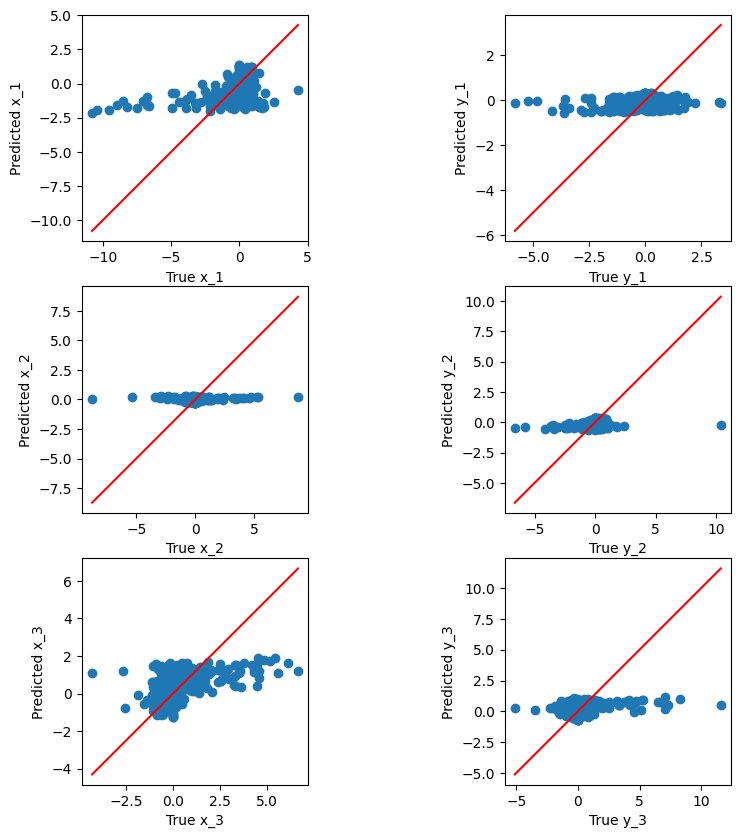

In [273]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy(), plot_title="baseline")


# Task 2: Nonlinear models on the data — the Polynomial Regression model
## Task 2.1 Development

In [274]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import root_mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,10), max_features=None):
    
    best_rsme = 1000
    best_degree = 0
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:
        print("Degree ", d)

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)


        train_error = root_mean_squared_error(y_train, y_train_predict)
        # print("Train RMSE:", train_error)

        val_error = root_mean_squared_error(y_val, y_val_predict)
        print("Val RMSE:", val_error)

        if val_error < best_rsme:
            best_rsme = val_error
            best_degree = d

        train_scores.append(train_error)
        validation_scores.append(val_error)

    return train_scores, validation_scores, best_rsme, best_degree, n_features_list

In [275]:
degrees=range(1,9)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(10):

    sample_train_set = train_set.sample(frac=0.01)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_rsmes.append(best_rsme)
    best_degrees.append(best_degree)

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

# Save best RMSEs and degrees to CSV
df_best = pd.DataFrame({
    'best_degree': best_degrees,
    'best_rsme': best_rsmes
})
df_best.to_csv('./output/csv/PR_best_rsme_degrees.csv', index=False)

Degree  1
Val RMSE: 1.4320636737862138
Degree  2
Val RMSE: 1.4320636737862138
Degree  3
Val RMSE: 1.4320636737862138
Degree  4


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 1.4320636737862138
Degree  1
Val RMSE: 1.2600589292429378
Degree  2
Val RMSE: 1.2600589292429378
Degree  3
Val RMSE: 1.2600589292429378
Degree  4


/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
/Users/stas/Programowanie/Put/Semestr5/AA/Assignment1/ML_the_3-body_problem/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2149: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 1.2600589292429378


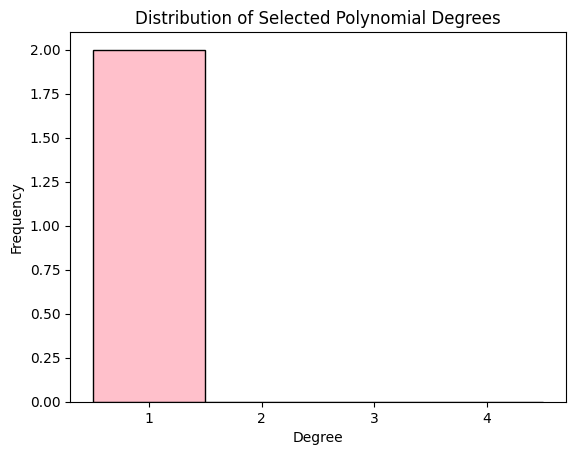

In [276]:
import matplotlib.pyplot as plt

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees, bins=bin_edges, color='pink', edgecolor='black')

plt.xticks(range(1, len(degrees) + 1))

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()
plt.savefig("./output/plots/PR_best_degrees_hist.pdf")

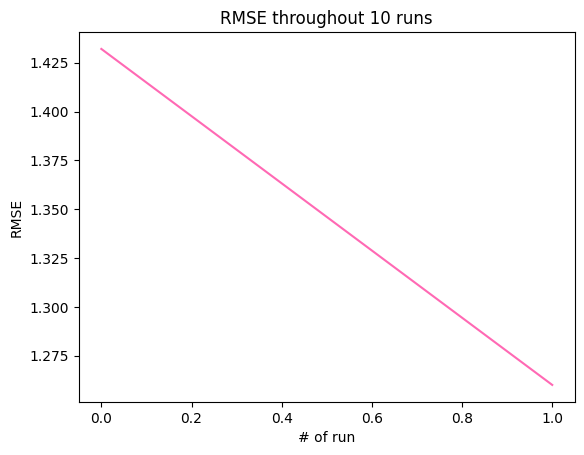

In [277]:
plt.plot(best_rsmes, color='hotpink')
plt.title('RMSE throughout 10 runs')
plt.xlabel('# of run')
plt.ylabel('RMSE')
plt.show()
plt.savefig("./output/plots/PR_best_rsmes.pdf")

### Train with the best-degree model


In [278]:
best_degree_ever = max(set(best_degrees), key=best_degrees.count)

print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=best_degree_ever)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)
output_test_predict = pipe_best_degree.predict(input_test)
output_submission_predict = pipe_best_degree.predict(input_submission)

save_predictions_to_csv(output_test_predict, "poly_test")
save_predictions_to_csv(output_submission_predict, "polynomial_submission")

train_error = root_mean_squared_error(output_train, output_train_predict)
print("Train RMSE:", train_error)

val_error = root_mean_squared_error(output_validation, output_val_predict)
print("Validation RMSE:", val_error)

Best degree 1
Train RMSE: 1.288477392880449
Validation RMSE: 1.174341683719964


## Task 2.2 Evaluation

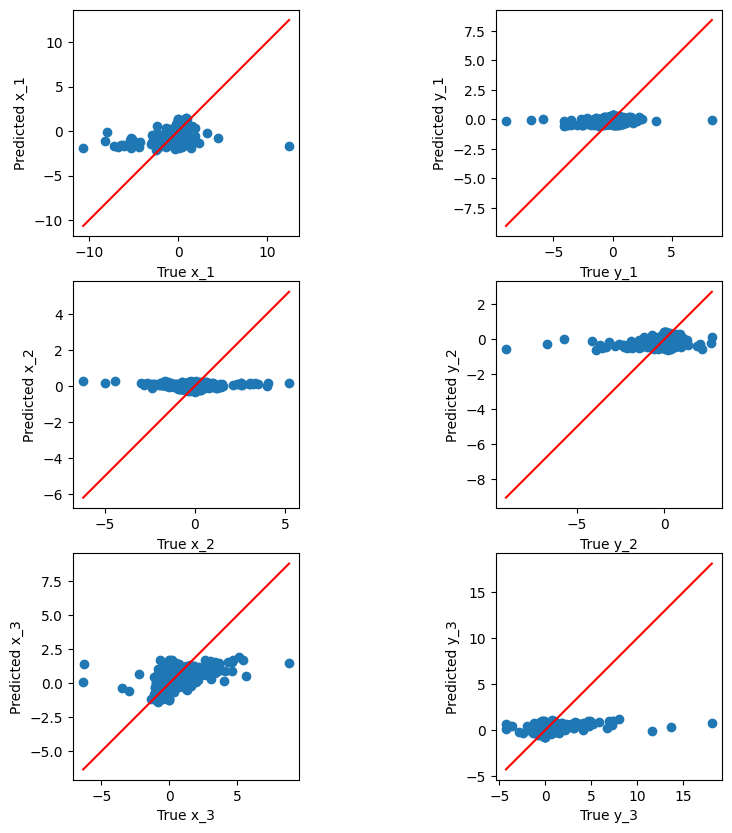

In [279]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy(), plot_title="polynomial")

# Task 3: Feature Engineering
## Task 3.1 Removing variables

## Task 3.2 Evaluation of Variable Reduction

## Task 3.3 Adding Variables

## Task 3.4 Evaluation of Variable Augmentation

# Task 4: Nonparamentric Model — the k-Nearest Neighbors Regressor
## Task 4.1 Development

In [280]:
    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import time

In [281]:
analytics = []
def validate_knn_regression(X_train, y_train, X_val, y_val, k=range(1,15)):
    for n_neighbors in k:
        pipe = Pipeline(
            [
                    ('scaling', StandardScaler()), 
                    ("model", KNeighborsRegressor(n_neighbors=n_neighbors))
            ])
        start_time = time.time()

        pipe.fit(X_train, y_train)
        y_hat = pipe.predict(X_val)
        elapsed_time = time.time() - start_time
        rmse = root_mean_squared_error(y_hat, y_val)

        print(f'k: {n_neighbors} with RMSE: {rmse}, time: {elapsed_time}')
        analytics.append([n_neighbors, rmse, elapsed_time])

validate_knn_regression(input_train, output_train, input_validation, output_validation, k=range(1,15))

k: 1 with RMSE: 0.9455511341816937, time: 3.1252012252807617
k: 2 with RMSE: 0.9422191837680297, time: 3.2521419525146484
k: 3 with RMSE: 0.9400303837302918, time: 3.221997022628784
k: 4 with RMSE: 0.9298362121826557, time: 3.297600030899048
k: 5 with RMSE: 0.9268362019992343, time: 3.3759210109710693
k: 6 with RMSE: 0.9152894901037859, time: 3.467249870300293
k: 7 with RMSE: 0.9093634550260107, time: 3.5221869945526123
k: 8 with RMSE: 0.8767660655018868, time: 3.9214351177215576
k: 9 with RMSE: 0.8571404603698495, time: 4.266342878341675
k: 10 with RMSE: 0.8390740847892147, time: 4.318578243255615
k: 11 with RMSE: 0.8211546927262158, time: 3.974595069885254
k: 12 with RMSE: 0.80925179799751, time: 4.0057361125946045
k: 13 with RMSE: 0.8116827948131112, time: 4.111454010009766
k: 14 with RMSE: 0.8135434869295256, time: 4.103564023971558


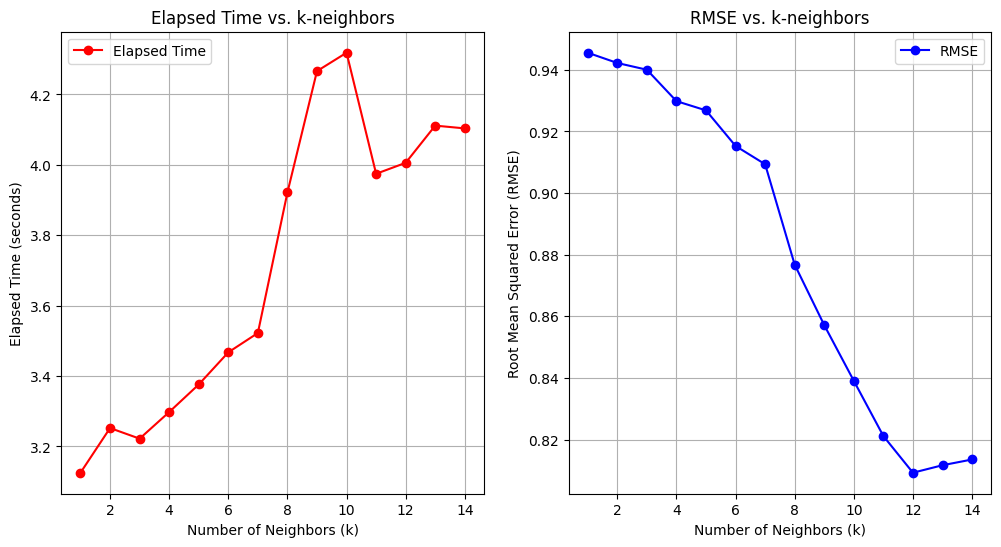

In [282]:
# Extract data for plotting
k_values = [item[0] for item in analytics]
rmse_values = [item[1] for item in analytics]
time_values = [item[2] for item in analytics]

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot elapsed time vs. k-neighbors
plt.subplot(1, 2, 1)
plt.plot(k_values, time_values, marker='o', linestyle='-', color='r', label='Elapsed Time')
plt.title('Elapsed Time vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Elapsed Time (seconds)')
plt.grid(True)
plt.legend()

# Plot RMSE vs. k-neighbors
plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b', label='RMSE')
plt.title('RMSE vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.legend()
plt.savefig("./output/plots/knn.pdf")
plt.show()

In [ ]:
pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", KNeighborsRegressor(n_neighbors=13))
    ])

pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
y_hat_test = pipe.predict(input_test)
y_hat_submission = pipe.predict(input_submission)
save_predictions_to_csv(y_hat_test, "knn_test")
save_predictions_to_csv(y_hat_submission, "knn_submission")
rmse = root_mean_squared_error(output_validation, y_hat)
rmse_test = root_mean_squared_error(output_test, y_hat_test)

print("RMSE: ", rmse)
print("RMSE Test: ", rmse_test)
print(f'k: {13} with RMSE: {rmse}')


## Task 4.2 Evaluation

In [ ]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy(), plot_title="knn_yhat")

# Task 5 [Optional]